In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Set2") 
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('data/drugsComTrain_raw.csv')
test = pd.read_csv('data/drugsComTest_raw.csv')
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [3]:
#combining datasets as they both have same columns
data = pd.concat([df, test])
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [4]:
print("Combined dataset shape:", data.shape)

Combined dataset shape: (215063, 7)


In [5]:
# describing the data
data.describe()

uniqueID         rating    usefulCount
count  215063.000000  215063.000000  215063.000000
mean   116039.364814       6.990008      28.001004
std     67007.913366       3.275554      36.346069
min         0.000000       1.000000       0.000000
25%     58115.500000       5.000000       6.000000
50%    115867.000000       8.000000      16.000000
75%    173963.500000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000

In [6]:
# information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [7]:
# datatype of columns
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
# checking for null values
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [9]:
import sys
print(sys.executable)

/opt/anaconda3/bin/python


In [10]:
!{sys.executable} -m pip install wordcloud

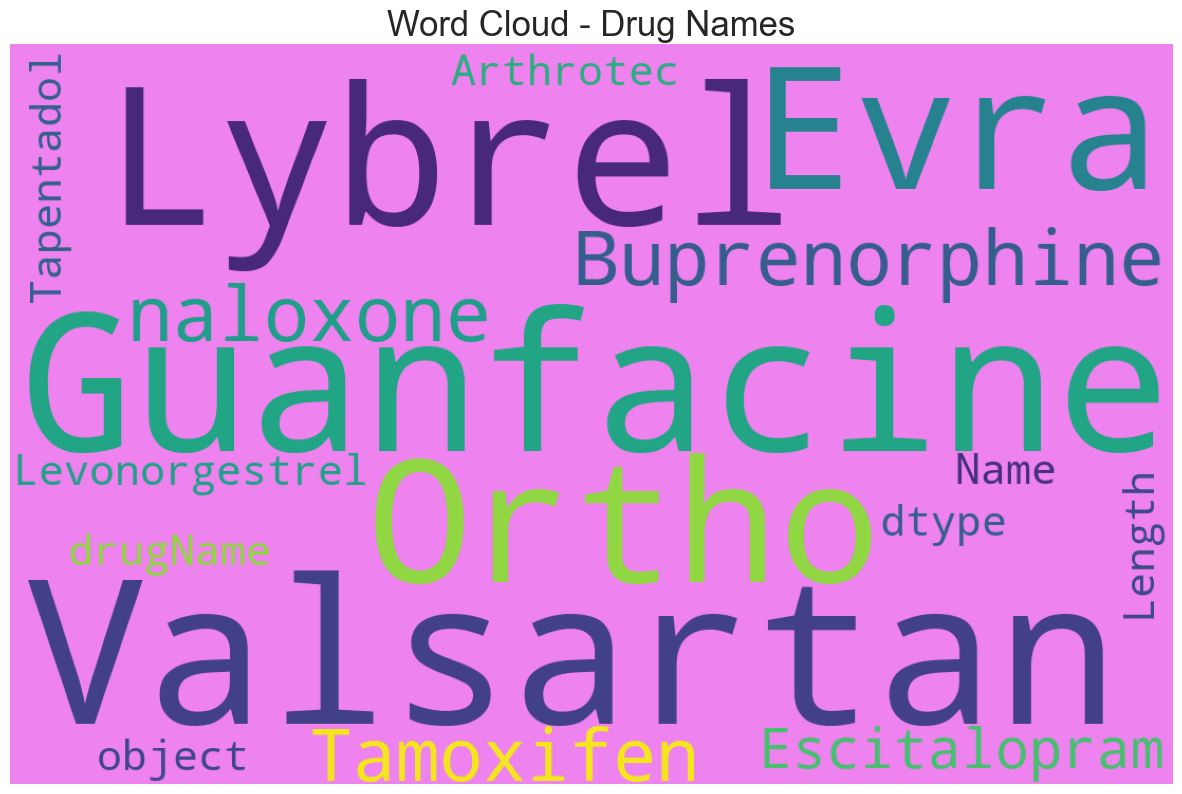

In [11]:
# let's see the words cloud for the reviews 

# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'violet', stopwords = stopwords, width = 1100, height = 700).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

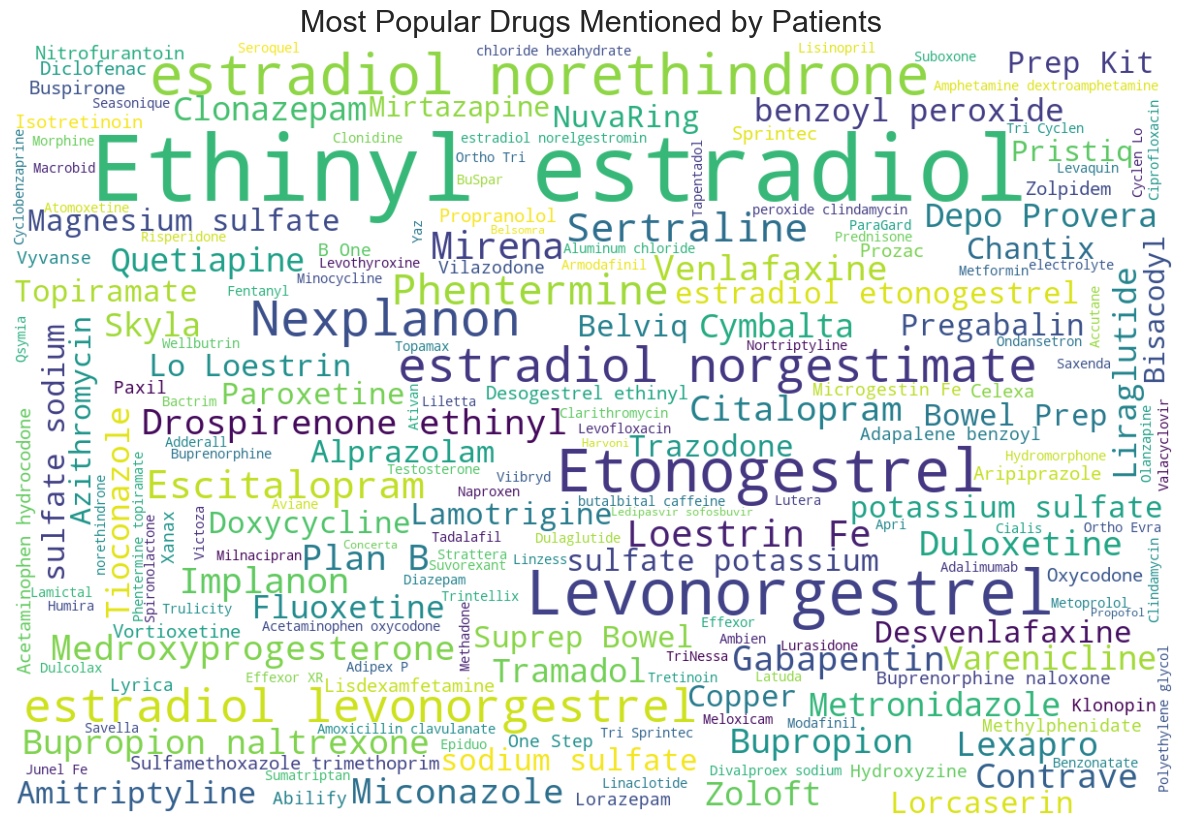

In [12]:
# Word Cloud for Most Frequent Drug Names

from wordcloud import WordCloud, STOPWORDS

# Define stopwords
stopwords = set(STOPWORDS)

all_drugs_text = ' '.join(data['drugName'].astype(str))

# Create WordCloud
wordcloud = WordCloud(
    background_color='white',     
    stopwords=stopwords,
    colormap='viridis',           
    width=1200,
    height=800,
    contour_color='steelblue',  
    contour_width=2
).generate(all_drugs_text)

# Plot settings
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Popular Drugs Mentioned by Patients', fontsize=22)

plt.savefig("drugname_wordcloud.png", bbox_inches='tight')

plt.show()

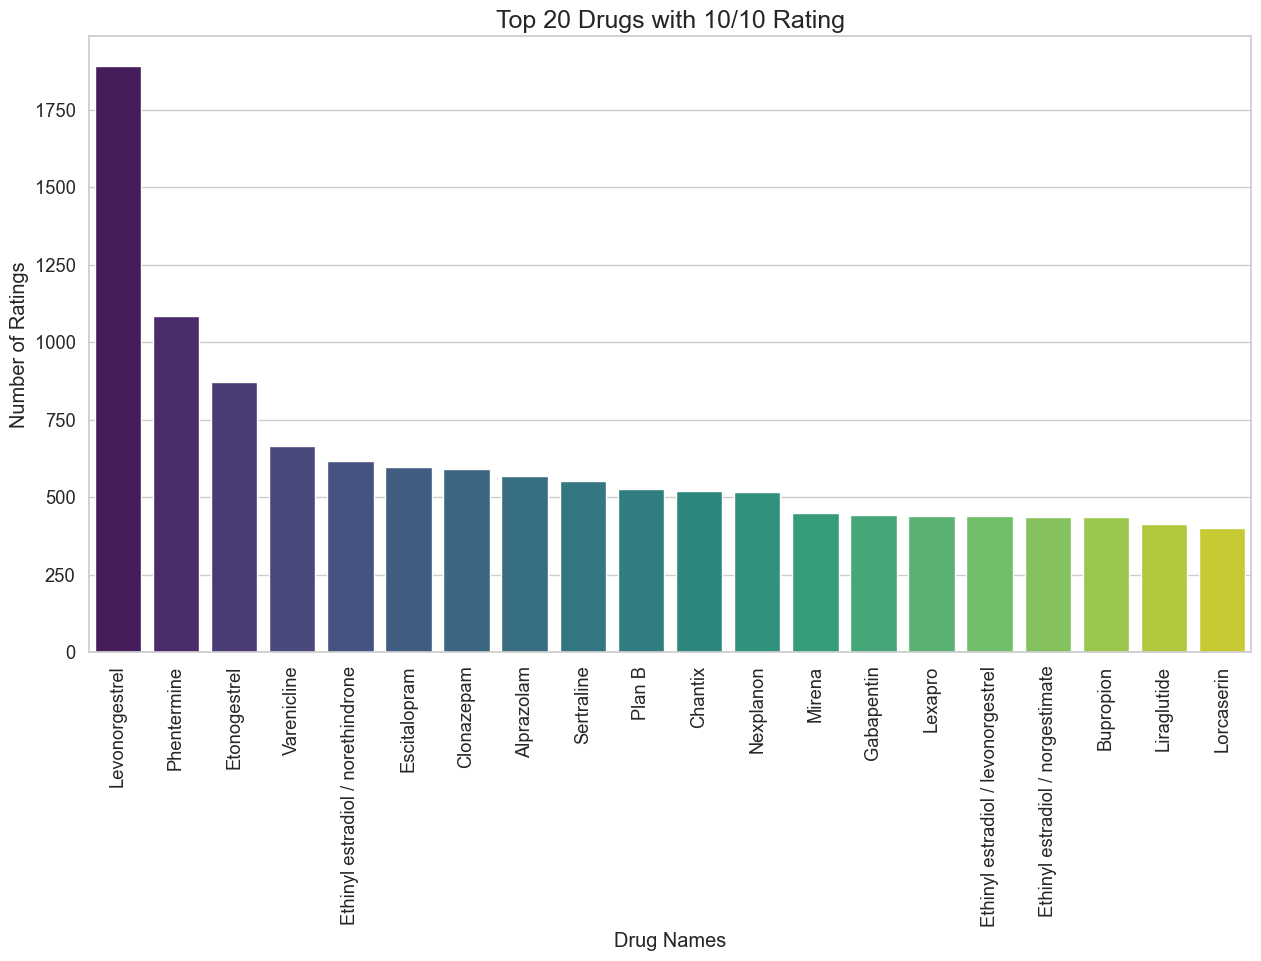

In [13]:
# Top 20 drugs with perfect rating (10/10)
sns.set(font_scale=1.2, style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

# Count drugs with rating 10
drug_counts = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drug_labels = list(drug_counts.keys())
counts = list(drug_counts.values())

sns_rating = sns.barplot(
    x=drug_labels[0:20],
    y=counts[0:20],
    palette='viridis'
)

sns_rating.set_title('Top 20 Drugs with 10/10 Rating', fontsize=18)
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()

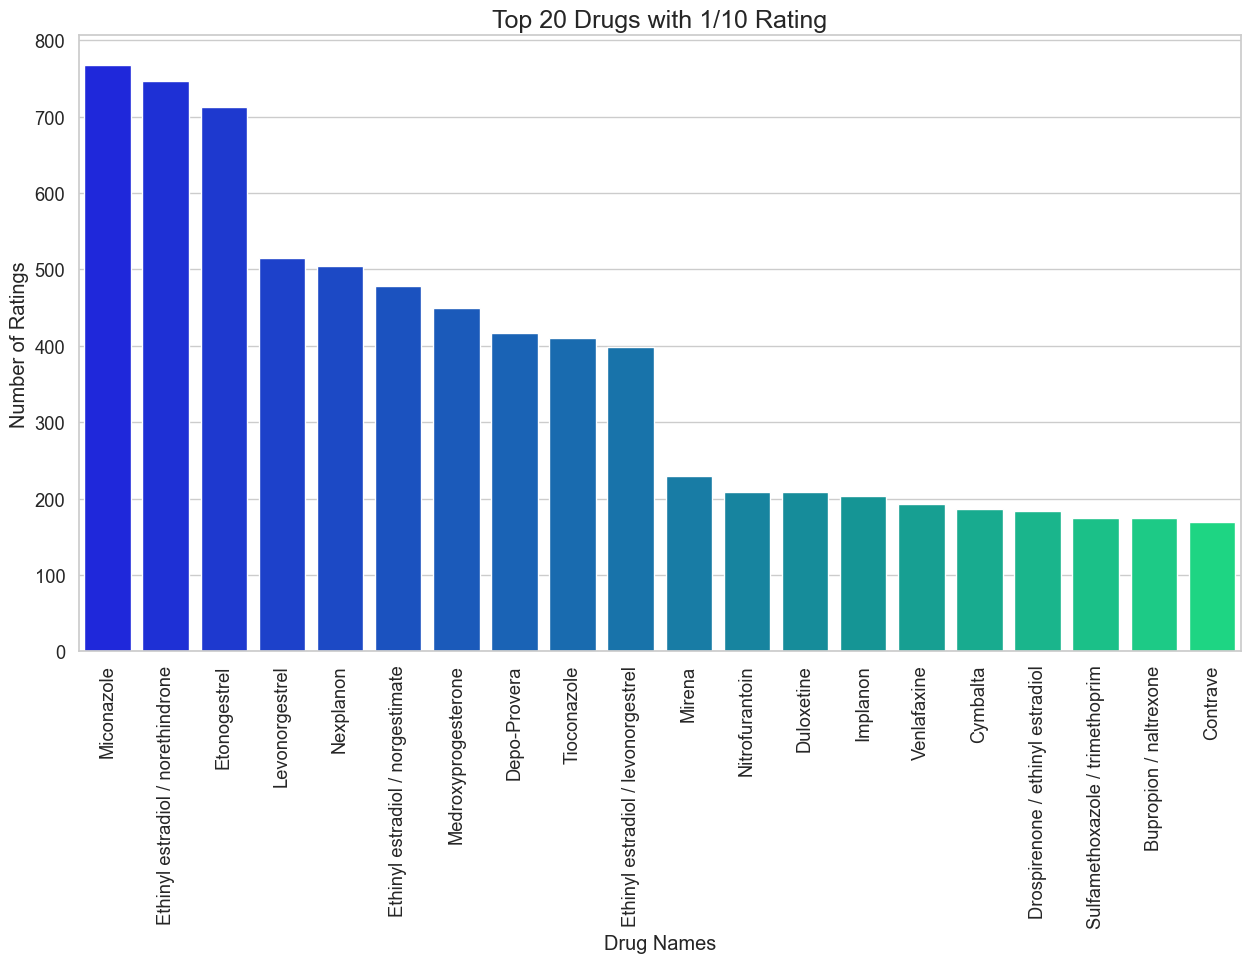

In [14]:
# Top 20 drugs with lowest rating (1/10)
sns.set(font_scale=1.2, style='whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

# Count drugs with rating 1
low_rating_counts = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drug_labels = list(low_rating_counts.keys())
counts = list(low_rating_counts.values())

sns_rating = sns.barplot(
    x=drug_labels[0:20],
    y=counts[0:20],
    palette='winter'
)

sns_rating.set_title('Top 20 Drugs with 1/10 Rating', fontsize=18)
sns_rating.set_xlabel("Drug Names")
sns_rating.set_ylabel("Number of Ratings")
plt.setp(sns_rating.get_xticklabels(), rotation=90)
plt.show()


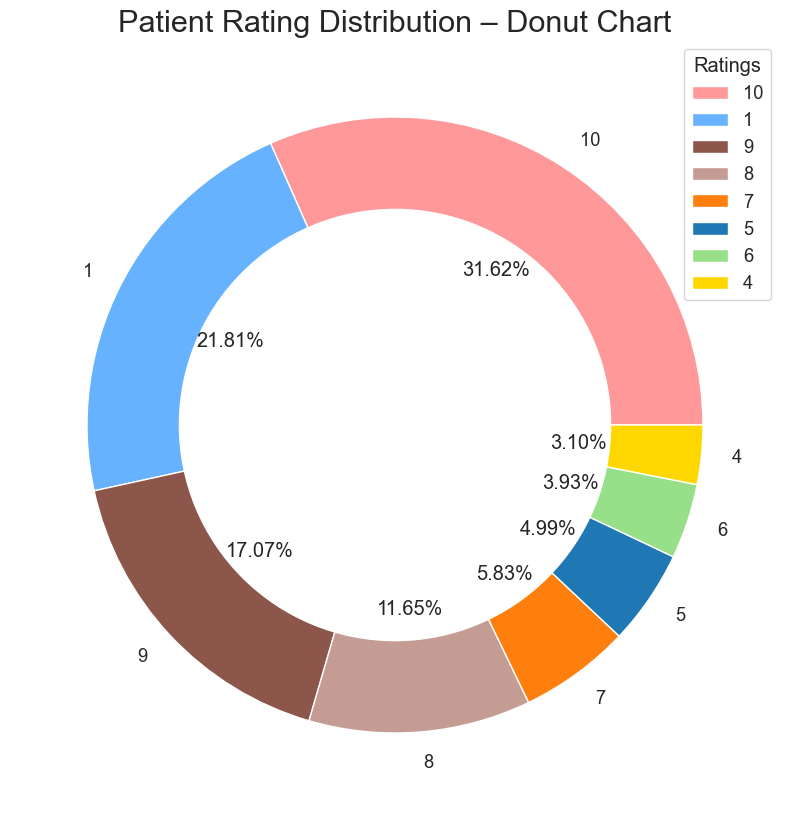

In [15]:
# Donut Chart: Share of Each Rating
rating_counts = [68005, 46901, 36708, 25046, 12547, 10723, 8462, 6671]
donut_colors = ['#FF9999','#66B2FF','#8C564B','#C49C94','#FF7F0E','#1F77B4','#98DF8A','#FFD700']
rating_labels = ["10", "1", "9", "8", "7", "5", "6", "4"]

my_circle = plt.Circle((0,0),0.7, color='white')

plt.figure(figsize=(10,10))
plt.pie(rating_counts, labels=rating_labels, colors=donut_colors, autopct='%.2f%%')
plt.gca().add_artist(my_circle)
plt.axis('off')
plt.title('Patient Rating Distribution – Donut Chart', fontsize=22)
plt.legend(title="Ratings", loc="upper right")
plt.show()

THE PIECHART REPRESENTS THE RATING OF REVIEWS

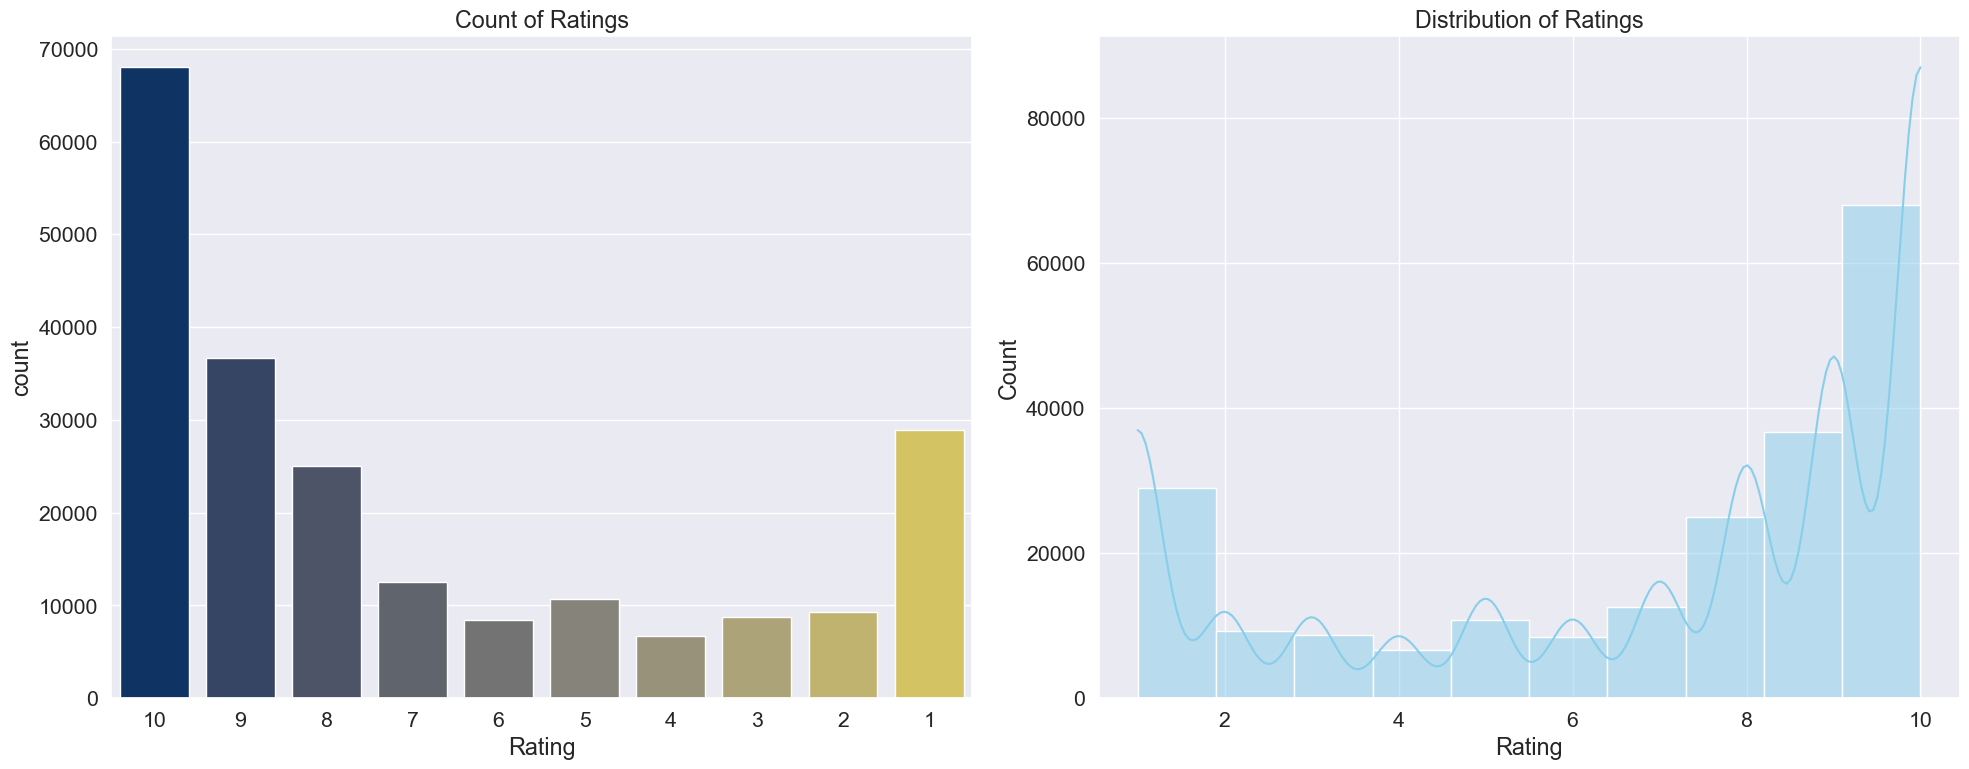

In [16]:
#  Countplot & Histogram to visualize ratings distribution
plt.rcParams['figure.figsize'] = [20, 8]
sns.set(font_scale=1.4, style='darkgrid')

fig, ax = plt.subplots(1, 2)

# Countplot
count_plot = sns.countplot(x=data['rating'], palette='cividis', order=list(range(10,0,-1)), ax=ax[0])
count_plot.set_title('Count of Ratings')
count_plot.set_xlabel("Rating")

# Histogram
dist_plot = sns.histplot(data['rating'], bins=10, kde=True, color='skyblue', ax=ax[1])
dist_plot.set_title('Distribution of Ratings')
dist_plot.set_xlabel("Rating")

plt.tight_layout()
plt.show()

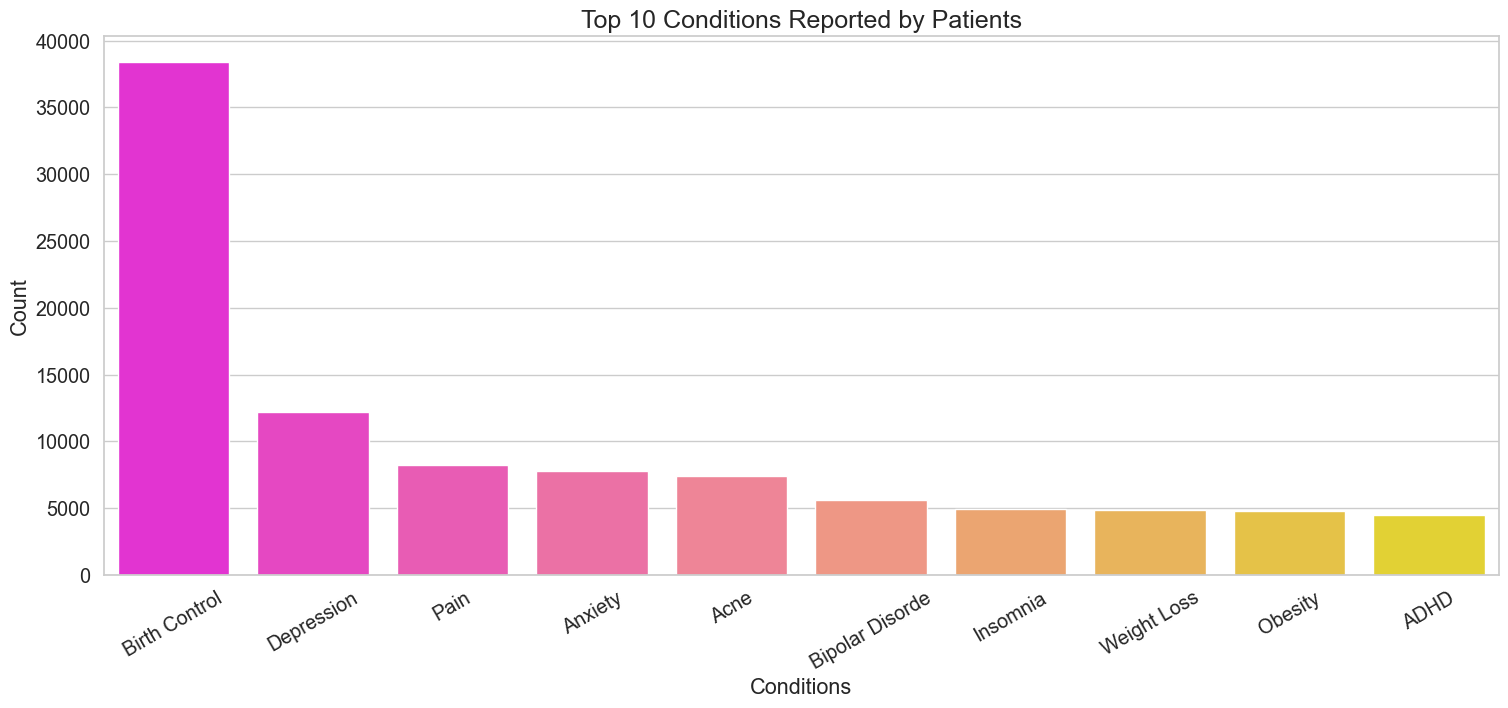

In [17]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]

sns.set(style='whitegrid', font_scale=1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x=top_condition, y=values, palette='spring')
sns_.set_title("Top 10 Conditions Reported by Patients", fontsize=18)
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count")
plt.xticks(rotation=30)
plt.show()


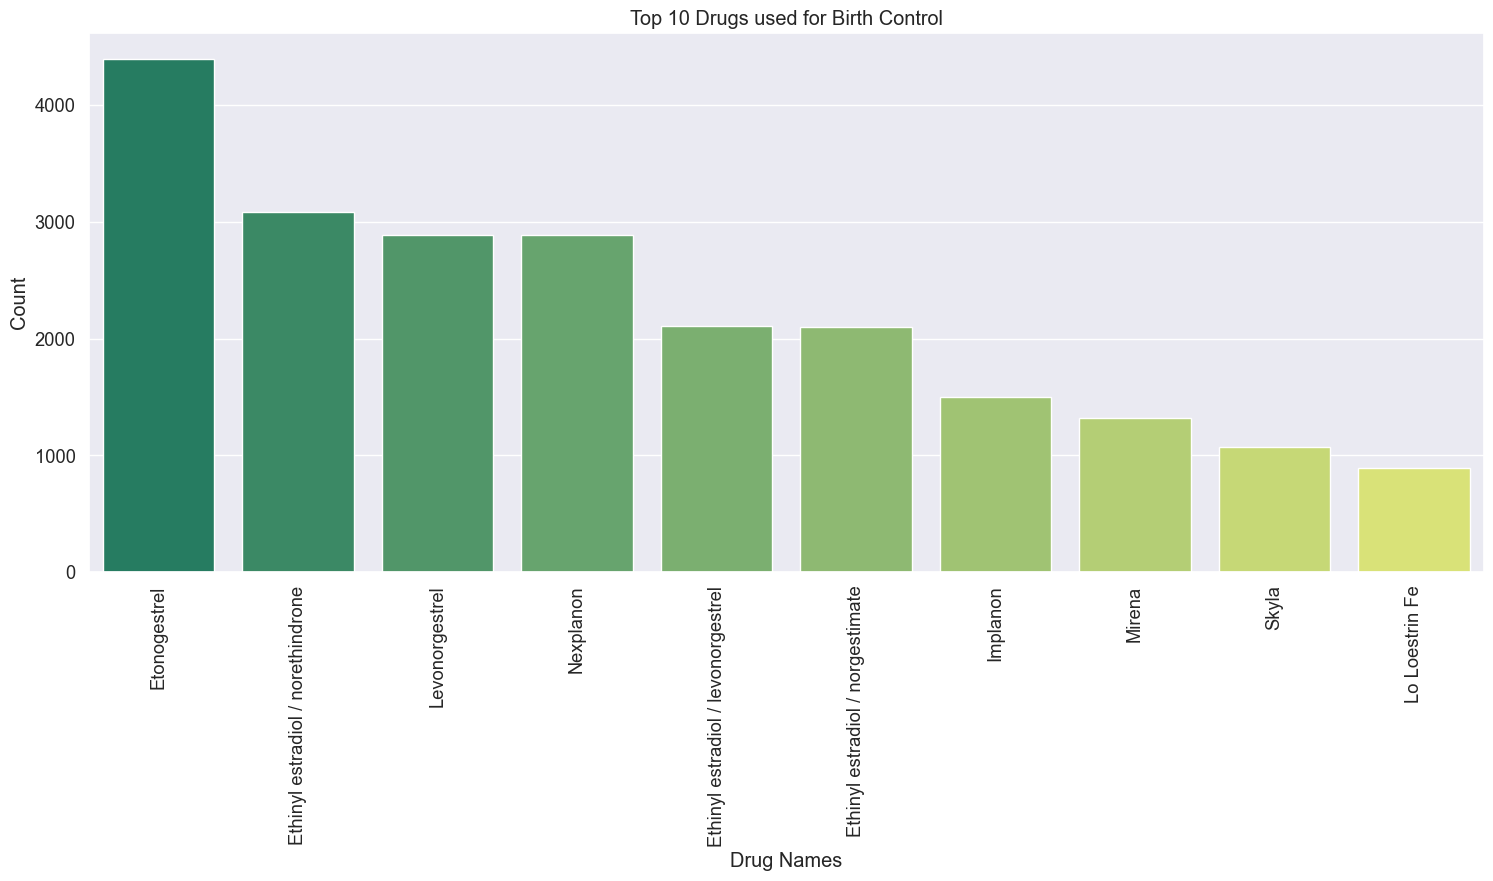

In [18]:
# Top 10 drugs which are used for Birth Control
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df1.index, y = df1.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_ylabel('Count')  
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90)
plt.show()

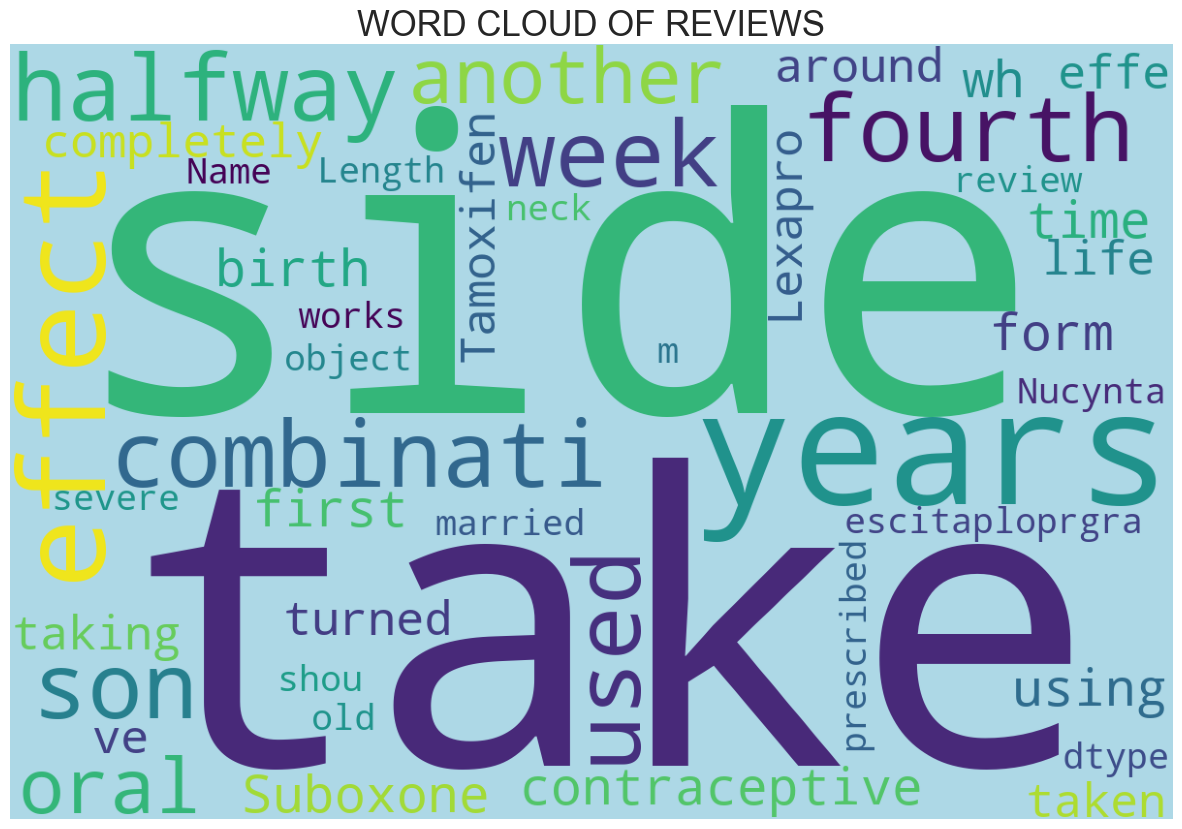

In [19]:
# word cloud for the reviews 
# most popular drugs

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(str(data['review']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

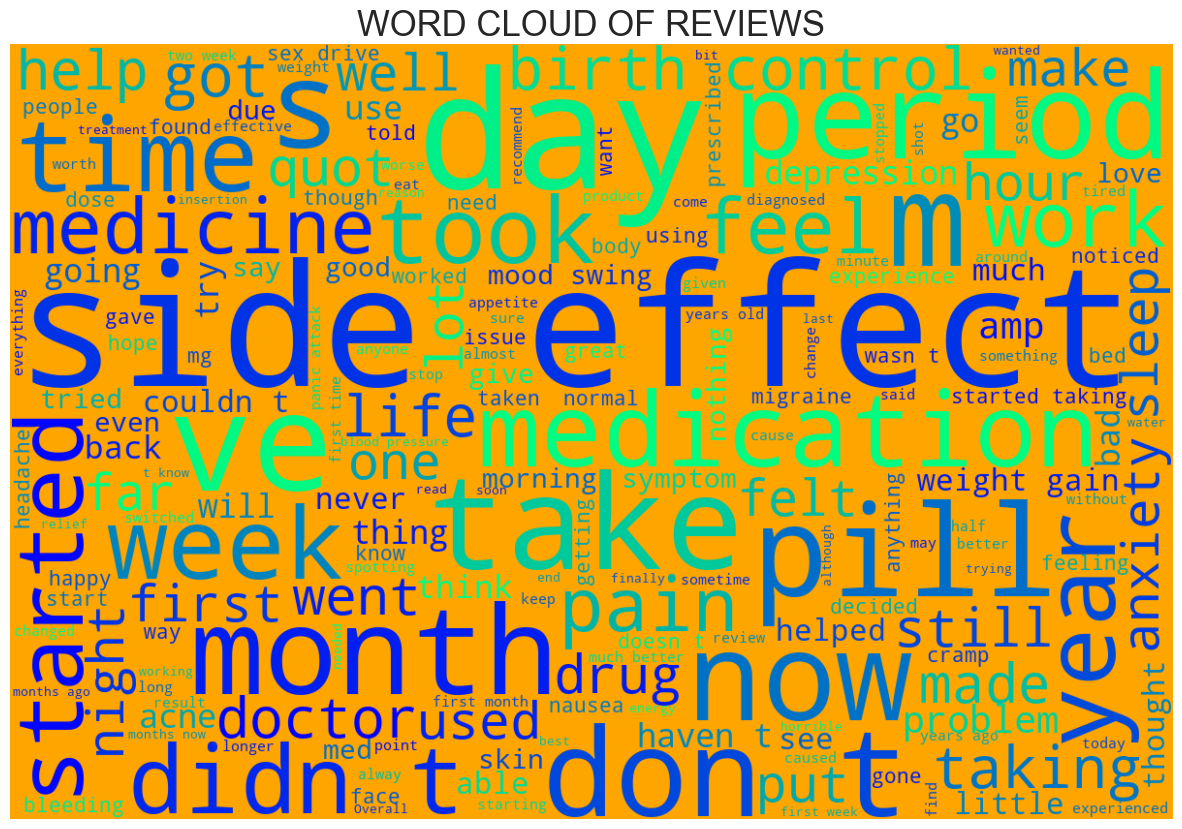

In [20]:
# Word Cloud of Patient Reviews:Shows most common words in reviews
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

all_reviews_text = ' '.join(data['review'].astype(str))

wordcloud = WordCloud(
    background_color='orange',  
    stopwords=stopwords,
    width=1200,
    height=800,
    colormap='winter',            
    contour_color='steelblue',
    contour_width=2
).generate(all_reviews_text)

plt.rcParams['figure.figsize'] = (15, 15)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORD CLOUD OF REVIEWS', fontsize=25)
plt.show()

In [21]:
# Feature Engineering: binary sentiment based on ratings
# Ratings 5 and above are considered positive (1), below 5 negative (0)
data.loc[data['rating'] >= 5, 'Review_Sentiment'] = 1
data.loc[data['rating'] < 5, 'Review_Sentiment'] = 0

# distribution of Review_Sentiment
data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    161491
0.0     53572
Name: count, dtype: int64

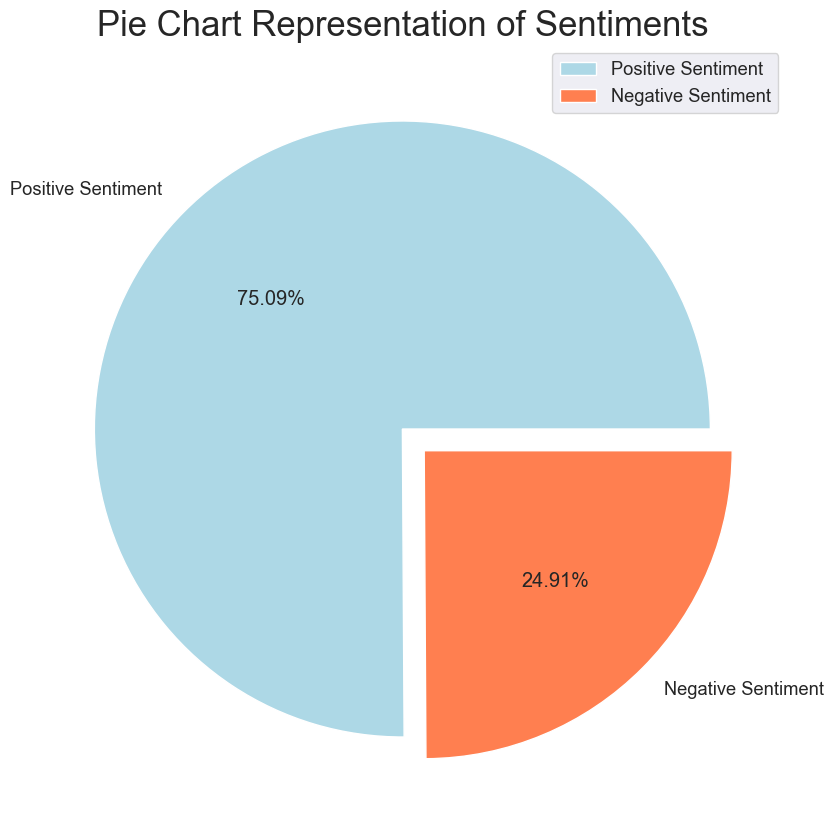

In [22]:
# Pie Chart to represent patient review sentiments
size = [161491, 53572]
colors = ['lightblue', 'coral']  
labels = "Positive Sentiment", "Negative Sentiment"
explode = [0, 0.1] 

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors=colors, labels=labels, explode=explode, autopct='%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize=25)
plt.legend()
plt.show()

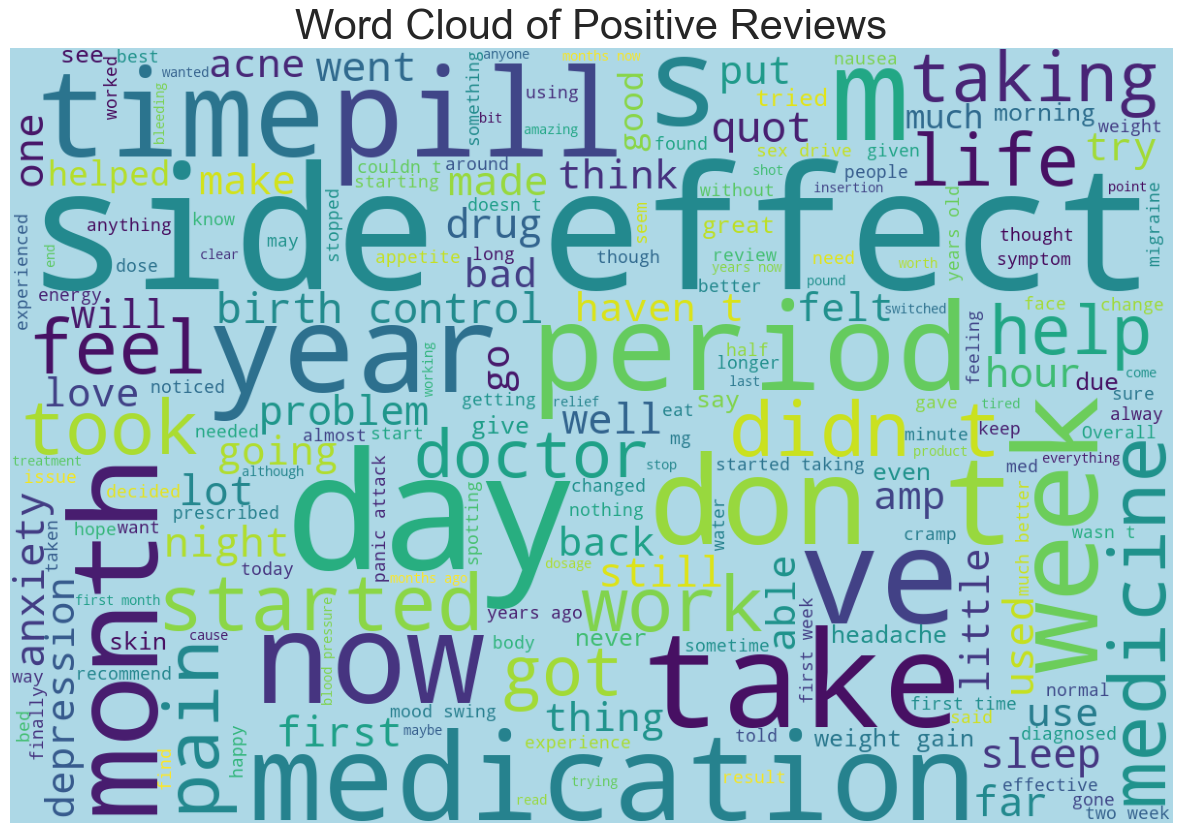

In [23]:
# Word cloud for the postive sentiments

positive_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 1]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightblue', stopwords = stopwords, width = 1200, height = 800).generate(positive_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Positive Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

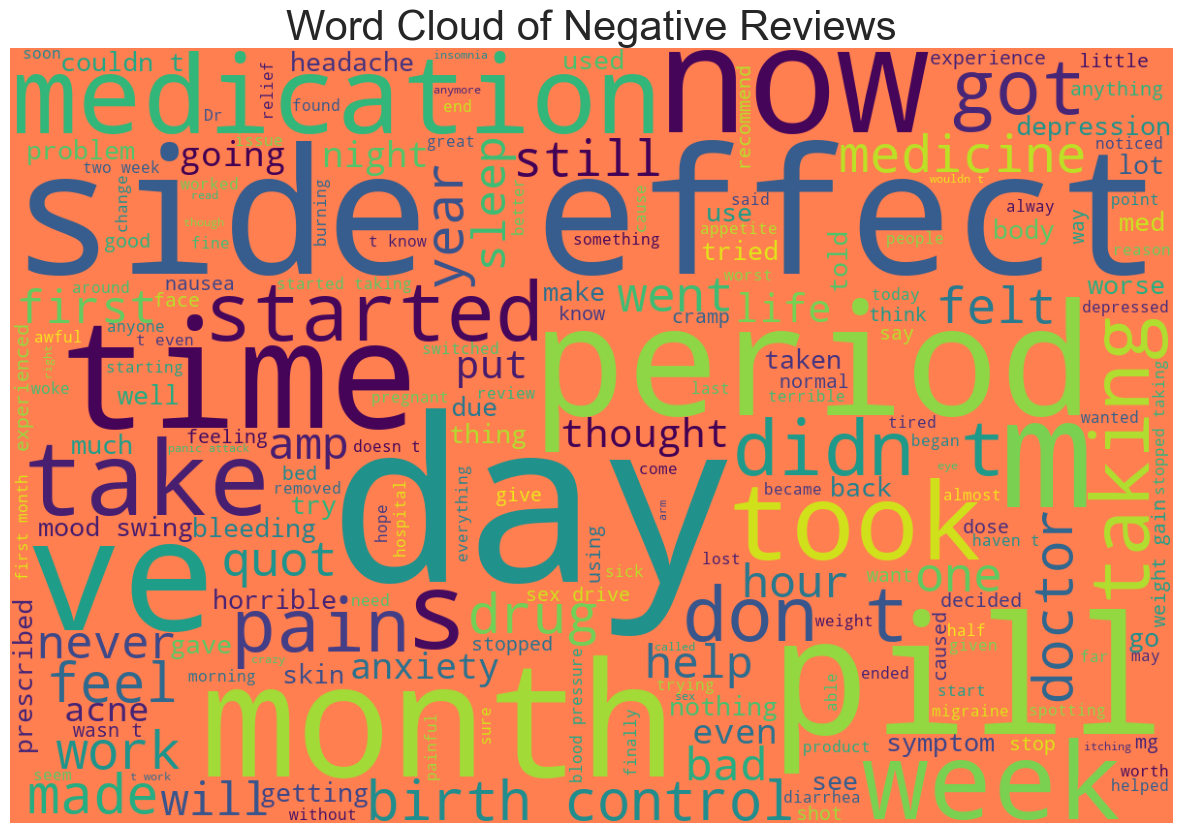

In [24]:
# Word cloud for the Negative sentiments

negative_sentiments = " ".join([text for text in data['review'][data['Review_Sentiment'] == 0]])

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'coral', stopwords = stopwords, width = 1200, height = 800).generate(negative_sentiments)

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud of Negative Reviews', fontsize = 30)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [25]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

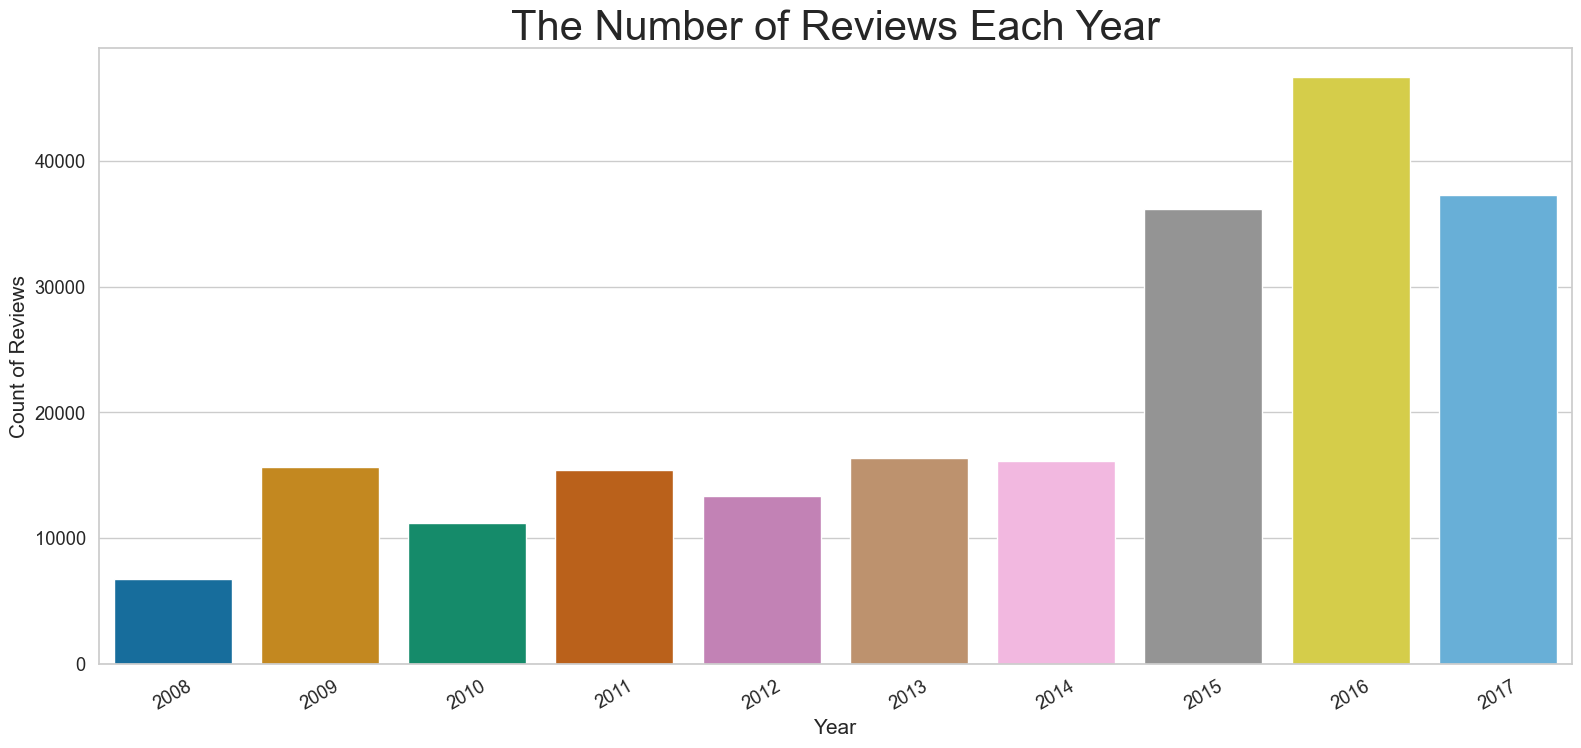

In [29]:
plt.figure(figsize=(19, 8))
sns.set(style='whitegrid', font_scale=1.2)

sns.countplot(x='Year', data=data, palette='colorblind')

plt.title('The Number of Reviews Each Year', fontsize=30)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.xticks(rotation=30)
plt.show()

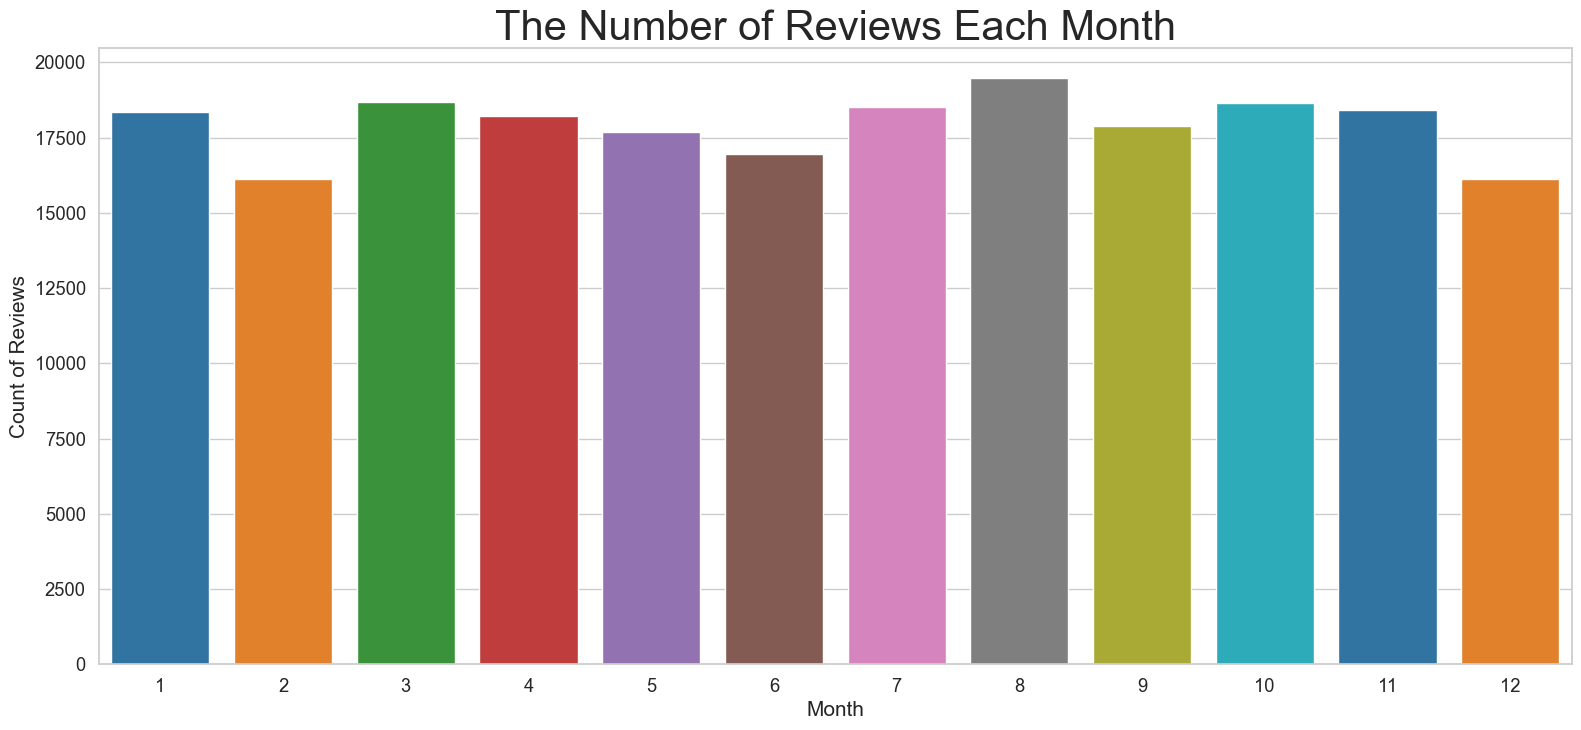

In [30]:
plt.figure(figsize=(19, 8))
sns.set(style='whitegrid', font_scale=1.2)

sns.countplot(x='month', data=data, palette='tab10')

plt.title('The Number of Reviews Each Month', fontsize=30)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()

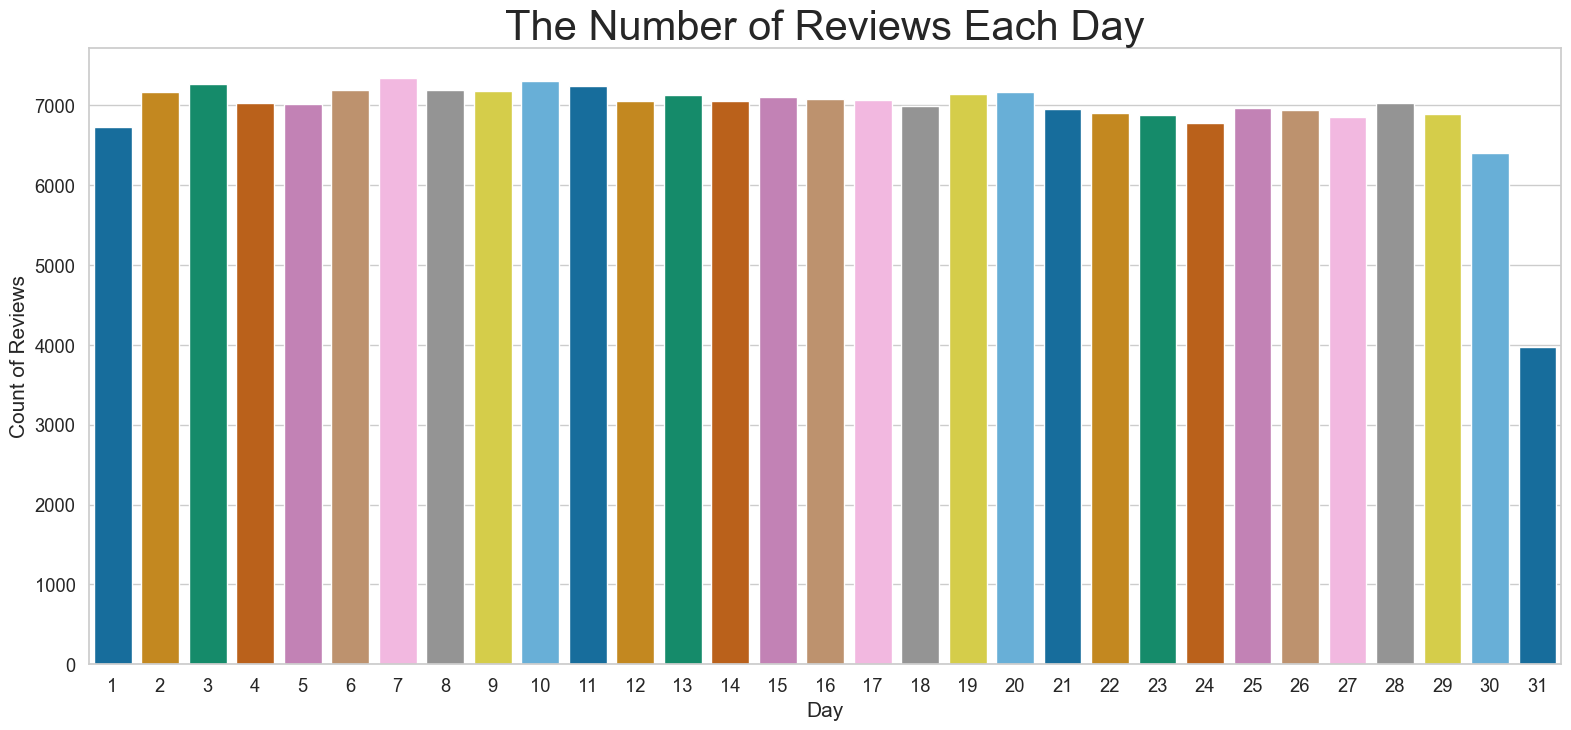

In [34]:
# looking at the no. of reviews in each day

plt.figure(figsize=(19, 8))
sns.set(style='whitegrid', font_scale=1.2)

sns.countplot(x='day', data=data, palette='colorblind')

plt.title('The Number of Reviews Each Day', fontsize=30)
plt.xlabel('Day', fontsize=15)
plt.ylabel('Count of Reviews', fontsize=15)
plt.show()

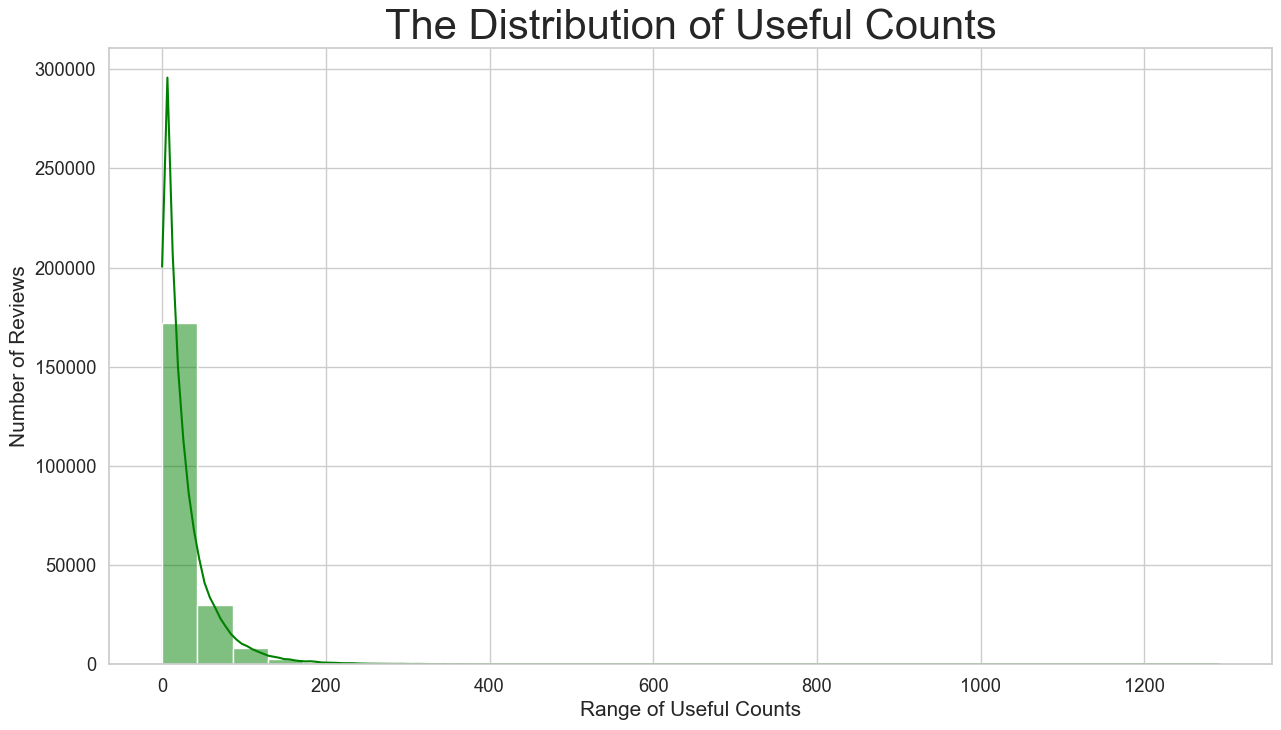

In [36]:
# Distribution of Useful Counts

plt.figure(figsize=(15, 8))
sns.set(style='whitegrid', font_scale=1.2)

sns.histplot(data['usefulCount'], kde=True, color='green', bins=30)

plt.title('The Distribution of Useful Counts', fontsize=30)
plt.xlabel('Range of Useful Counts', fontsize=15)
plt.ylabel('Number of Reviews', fontsize=15)
plt.show()

In [88]:
# Save freq and mean sentiment mappings
drug_freq_map = data.set_index('drugName')['drugName_freq'].to_dict()
drug_mean_sentiment_map = data.set_index('drugName')['drugName_mean_sentiment'].to_dict()

cond_freq_map = data.set_index('condition')['condition_freq'].to_dict()
cond_mean_sentiment_map = data.set_index('condition')['condition_mean_sentiment'].to_dict()

joblib.dump(drug_freq_map, "drug_freq_map.pkl")
joblib.dump(drug_mean_sentiment_map, "drug_mean_sentiment_map.pkl")
joblib.dump(cond_freq_map, "cond_freq_map.pkl")
joblib.dump(cond_mean_sentiment_map, "cond_mean_sentiment_map.pkl")

['cond_mean_sentiment_map.pkl']

In [63]:
#Function to preprocess reviews for NLP analysis
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [64]:
data['review_clean'] = review_clean(data['review'])

In [42]:
!{sys.executable} -m pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 6.4 MB/s eta 0:00:00a 0:00:01


In [43]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [65]:
# Snowball stemmer to convert words into root form
Snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [66]:
data.head(3)

uniqueID    drugName                     condition  \
0    206461   Valsartan  Left Ventricular Dysfunction   
1     95260  Guanfacine                          ADHD   
2     92703      Lybrel                 Birth Control   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   

   usefulCount  Review_Sentiment  Year  month  ...  \
0           27               1.0  2012      5  ...   
1          192               1.0  2010      4  ...   
2           17               1.0  2009     12  ...   

                                     review_clean_ss sentiment_clean_ss  \
0  "it has no side effect, i take it in combinati...           0.000000   
1  "my son is halfway through his fourth week of ...           0.168333   
2  "i used to take another oral contraceptive, wh...           0.067210   

   count_word  count_unique_word count_letters  count_punctuations  \
0          17                 17            79                   3   
1         141                106           741                  23   
2         134                 95           743                  34   

   count_words_upper  count_words_title  count_stopwords  mean_word_len  
0                  1                  6                7       3.705882  
1                  2                 13               69       4.248227  
2                  6                 15               59       4.544776  

[3 rows x 24 columns]

In [67]:
def sentiment(review):
    # Sentiment polarity of the reviews
    polarity_scores = []
    for text in review:
        analysis = TextBlob(text)
        polarity_scores.append(analysis.sentiment.polarity)
    return polarity_scores

In [48]:
data['sentiment'] = sentiment(data['review'])

In [49]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [68]:
# cleaned review version without stopword removal or stemming
data['review_clean_no_stem'] = review_clean(data['review'])
data['sentiment_clean_no_stem'] = sentiment(data['review_clean_no_stem'])

In [51]:
data = data.dropna(how="any", axis=0)

In [52]:
#Word count in each review
data['count_word']=data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_len"] = data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [53]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean', 'review_clean_ss',
       'sentiment_clean_ss', 'count_word', 'count_unique_word',
       'count_letters', 'count_punctuations', 'count_words_upper',
       'count_words_title', 'count_stopwords', 'mean_word_len'],
      dtype='object')

In [89]:
drug_freq_map = joblib.load("drug_freq_map.pkl")
drug_mean_sentiment_map = joblib.load("drug_mean_sentiment_map.pkl")
cond_freq_map = joblib.load("cond_freq_map.pkl")
cond_mean_sentiment_map = joblib.load("cond_mean_sentiment_map.pkl")

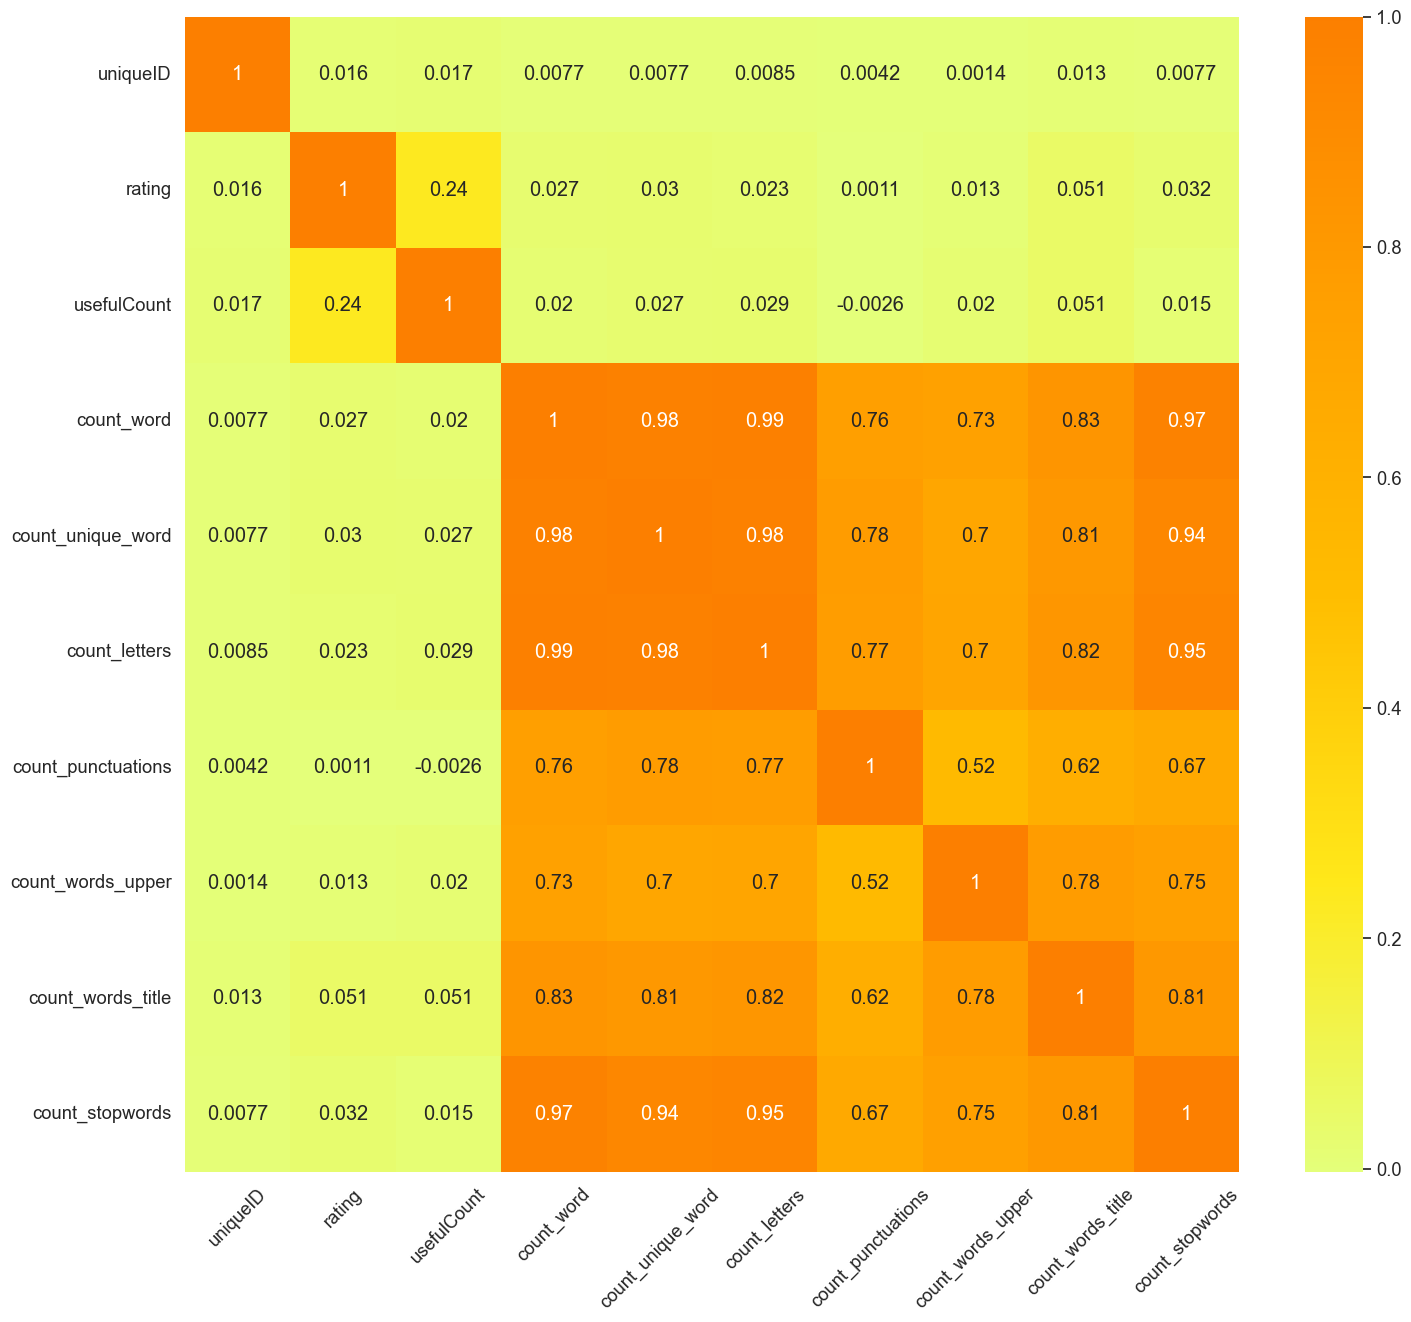

In [62]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [69]:
# Label Encoding, Frequency Encoding and Mean Sentiment Encoding for DrugName and Condition
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
label_encoder_feat = {}

for feature in ['drugName', 'condition']:
    # Label Encoding
    label_encoder_feat[feature] = LabelEncoder()
    data[feature + '_LE'] = label_encoder_feat[feature].fit_transform(data[feature])
    
    # Frequency Encoding
    data[feature + '_freq'] = data[feature].map(data[feature].value_counts())
    
    # Mean sentiment encoding
    data[feature + '_mean_sentiment'] = data.groupby(feature)['Review_Sentiment'].transform('mean')

# The dataset now contains additional features: drugName_LE, condition_LE, drugName_freq, condition_freq, drugName_mean_sentiment, condition_mean_sentiment


In [71]:
!{sys.executable} -m pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00a 0:00:01


In [72]:
import warnings
warnings.filterwarnings('ignore')

# LightGBM and XGBoost
from xgboost import XGBClassifier
from lightgbm import LGBMModel, LGBMClassifier, plot_importance

# data splitting, metrics and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.ensemble import GradientBoostingClassifier

import sklearn, xgboost, lightgbm
print("Versions: sklearn-", sklearn.__version__, "xgboost-", xgboost.__version__, "lightgbm-", lightgbm.__version__)

Versions: sklearn- 1.6.1 xgboost- 3.0.5 lightgbm- 4.6.0


In [73]:
# Defining Features and Target, selecting relevant features for sentiment prediction
features = data[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                 'count_punctuations', 'count_words_upper', 'count_words_title',
                 'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

# Splitting the data into training and testing sets (stratify ensures proportional classes)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42, stratify=target
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (149708, 15)
Testing set size: (64161, 15)


In [76]:
# Selecting features for model training
feature_cols = [
    'usefulCount', 'sentiment', 'day', 'month', 'Year',
    'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
    'count_punctuations', 'count_words_upper', 'count_words_title',
    'count_stopwords', 'mean_word_len',
    # Encoded categorical features
    'drugName_LE', 'drugName_freq', 'drugName_mean_sentiment',
    'condition_LE', 'condition_freq', 'condition_mean_sentiment'
]

X = data[feature_cols]
y = data['Review_Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [90]:
df['drugName_freq'] = df['drugName'].map(drug_freq_map).fillna(0)
df['drugName_mean_sentiment'] = df['drugName'].map(drug_mean_sentiment_map).fillna(0)
df['condition_freq'] = df['condition'].map(cond_freq_map).fillna(0)
df['condition_mean_sentiment'] = df['condition'].map(cond_mean_sentiment_map).fillna(0)

In [ ]:
# Initialize LightGBM Classifier with hyperparameters and random_state for reproducibility
clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=0.10,
    num_leaves=30,
    subsample=0.9,
    max_depth=7,
    reg_alpha=0.1,      # L1 regularization
    reg_lambda=0.1,     # L2 regularization
    min_split_gain=0.01,
    min_child_weight=2,
    verbose=-1,
    random_state=42
)

# Train the model
model = clf.fit(X_train, y_train)

# Test set predictions
predictions = model.predict(X_test)

In [77]:
# Metrics
print("Accuracy of LightGBM model: {:.4f}".format(accuracy_score(y_test, predictions)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy of LightGBM model: 0.8901

Confusion Matrix:
 [[11159  4915]
 [ 2134 45953]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.69      0.76     16074
         1.0       0.90      0.96      0.93     48087

    accuracy                           0.89     64161
   macro avg       0.87      0.82      0.84     64161
weighted avg       0.89      0.89      0.89     64161



<Figure size 1200x900 with 0 Axes>

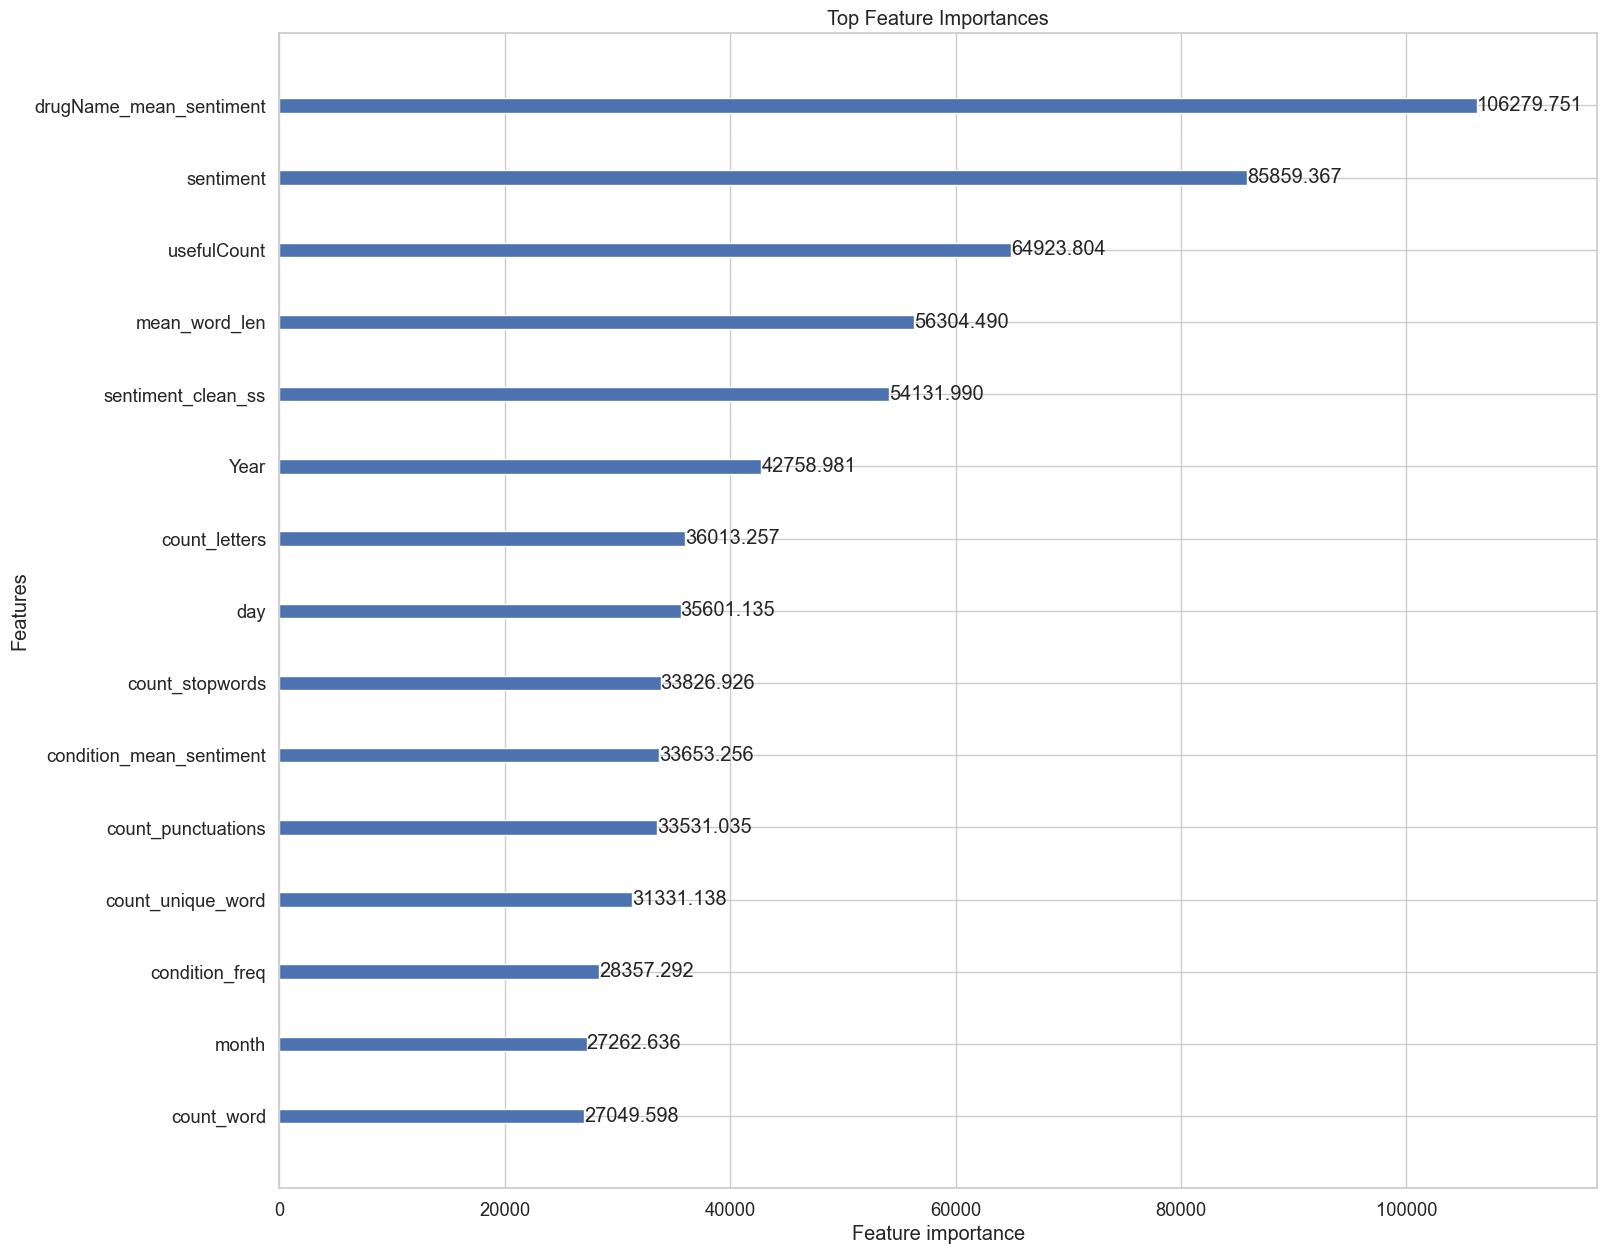

In [78]:
# Feature Importance
plt.figure(figsize=(12, 9))
sns.set(style='whitegrid', font_scale=1.2)
plot_importance(model, max_num_features=15, importance_type='gain', title='Top Feature Importances')
plt.show()

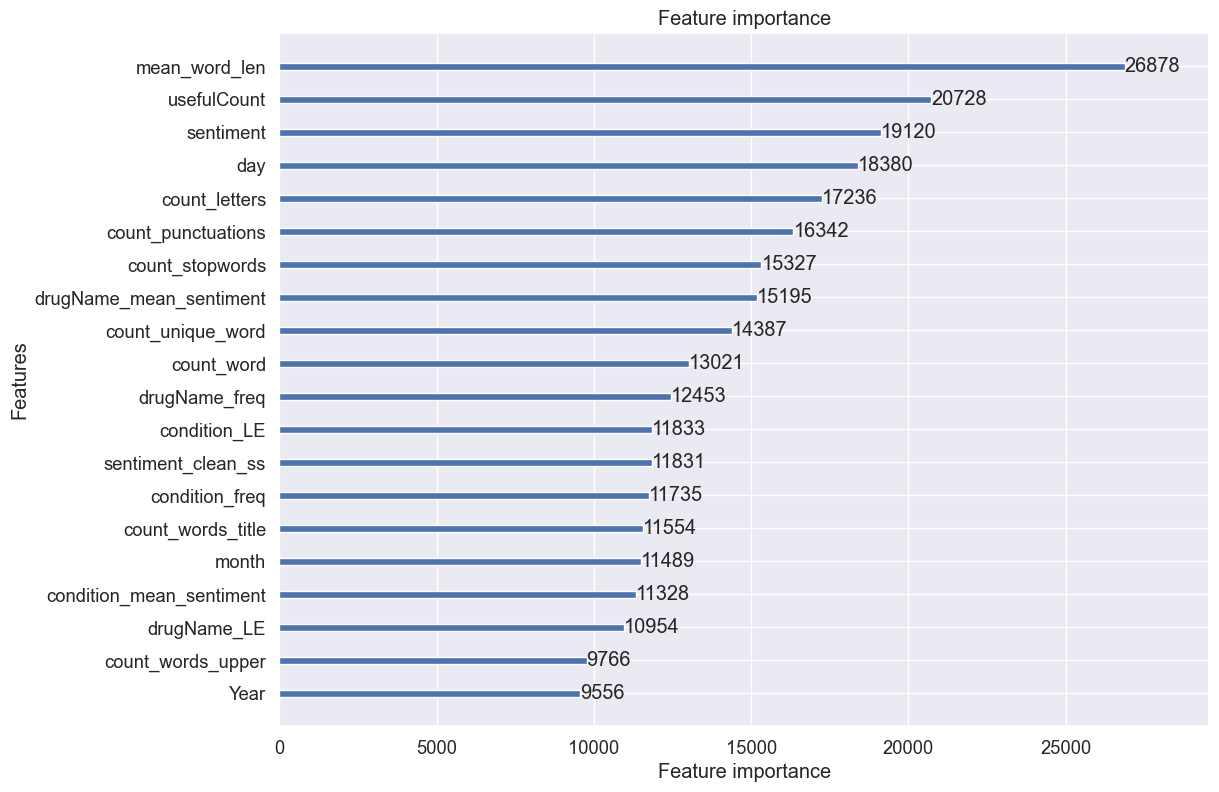

In [82]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

In [85]:
import joblib

joblib.dump(model, "lgbm_model.pkl")
joblib.dump(label_encoder_feat['drugName'], "label_encoder_drug.pkl")
joblib.dump(label_encoder_feat['condition'], "label_encoder_condition.pkl")


['label_encoder_condition.pkl']

In [87]:
import joblib

# Load your trained model
model = joblib.load("lgbm_model.pkl")

# If it’s an LGBMClassifier
if hasattr(model, "feature_name_"):
    print(model.feature_name_)
else:
    print("Feature names not found. Using default numeric indices")


['usefulCount', 'sentiment', 'day', 'month', 'Year', 'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters', 'count_punctuations', 'count_words_upper', 'count_words_title', 'count_stopwords', 'mean_word_len', 'drugName_LE', 'drugName_freq', 'drugName_mean_sentiment', 'condition_LE', 'condition_freq', 'condition_mean_sentiment']
